In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import cv2 as cv
import os
import random

from IPython import display
display.clear_output()

from PIL import Image
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from PIL import Image

Ultralytics YOLOv8.0.168  Python-3.9.17 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3080, 12288MiB)
Setup complete  (20 CPUs, 31.7 GB RAM, 189.3/1863.0 GB disk)


In [5]:
TRAIN_PATH = r"A:\Datasets\Drone_data_cleaned_2k\train"
TEST_PATH = r"A:\Datasets\Drone_data_cleaned_2k\val"

## Data preview
Train and test sets have been taken from a different UAV datasets.
For model training (train, train/dev splits), I used a custom dataset, which consists of 2700 hand-labeled images, taken mostly from YouTube videos and the internet.
*Let's take a look.*

In [10]:
files_list = os.listdir(TRAIN_PATH)

jpg_list = []
txt_list = []

for file_name in files_list:
    if file_name.endswith('.jpg'):
        jpg_list.append(file_name)
    else:
        txt_list.append(files_list)

print(f'Train Dataset size is {len(jpg_list)} images')

Train Dataset size is 2728 images


In [19]:
def yolobbox2bbox(bbox_list, img_shape):
    x, y, w, h = bbox_list
    x, w = x*img_shape[1], w*img_shape[1]
    y, h = y*img_shape[0], h*img_shape[0]
    x1, y1 = x-w/2, y-h/2
    x2, y2 = x+w/2, y+h/2
    return list(map(int, [x1, y1, x2, y2]))

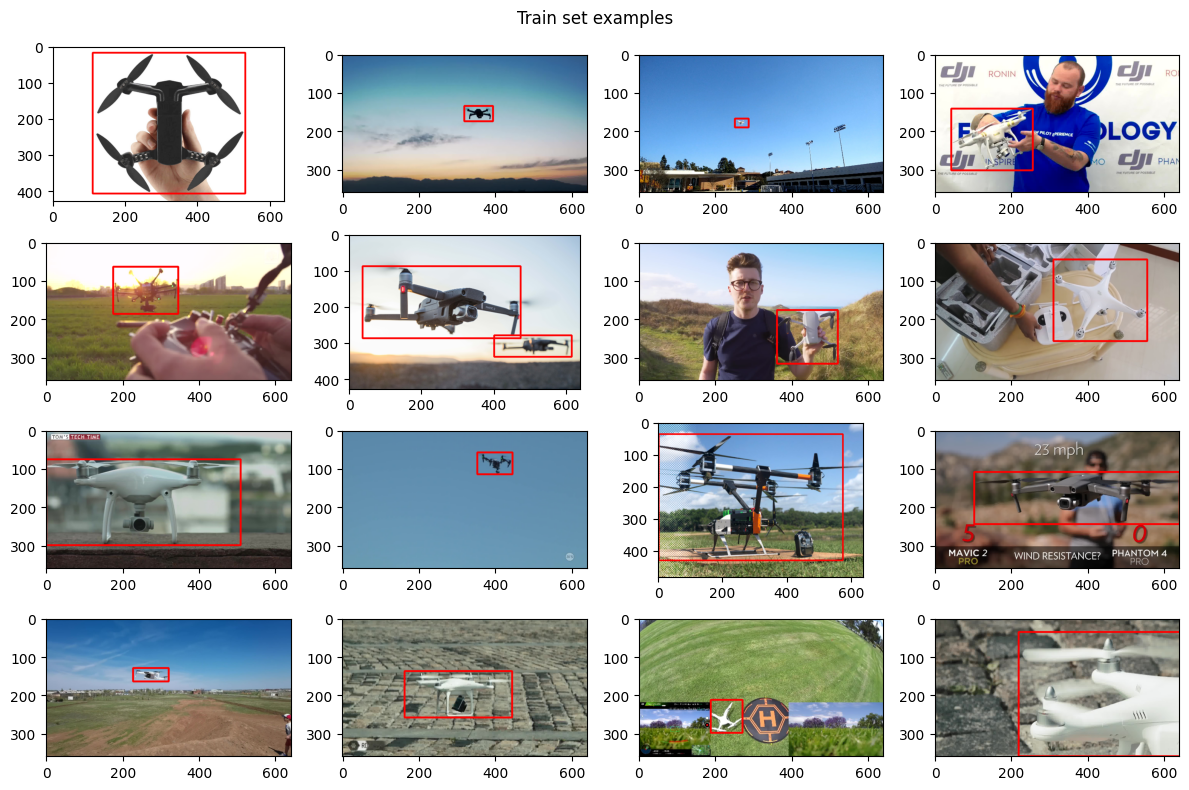

In [23]:
plot_row = 4
plot_col = 4

fig, axs = plt.subplots(plot_row, plot_col, figsize=(12,8), layout='tight')

for i in range(plot_row):
    for j in range(plot_col):
        rand_path = os.path.join(TRAIN_PATH, random.choice(jpg_list).rstrip('.jpg'))


        image = cv.imread(rand_path + '.jpg')
        width = 640
        height = int(image.shape[0] / (image.shape[1]/width))

        image = cv.resize(image, dsize=(width, height))
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)

        with open(rand_path + '.txt', encoding='utf-8') as f:
            coord_file = f.readlines()

        for bbox_coord in coord_file:
            bbox_coord = bbox_coord.strip()
            b_list = list(map(float, bbox_coord.split()[1:]))
            b_list = yolobbox2bbox(b_list, image.shape)

            image = cv.rectangle(image, (b_list[0], b_list[1]), (b_list[2], b_list[3]),
                          color=(255,0,0), thickness=4)

        axs[i, j].imshow(image)

fig.suptitle('Train set examples')
plt.show()

The *Test dataset* is taken from kaggle [Drone Object Detection](https://www.kaggle.com/datasets/sshikamaru/drone-yolo-detection).
Dataset consists of more than 4000 images, but a lot of them, sadly, were not labeled.

In [28]:
files_test_list = os.listdir(TEST_PATH)

jpg_test_list = []
txt_test_list = []

for file_name in files_test_list:
    if file_name.endswith('.JPEG'):
        jpg_test_list.append(file_name)
    else:
        txt_test_list.append(files_list)

print(f'Test Dataset size is {len(jpg_test_list)} labeled images')

Test Dataset size is 2867 labeled images


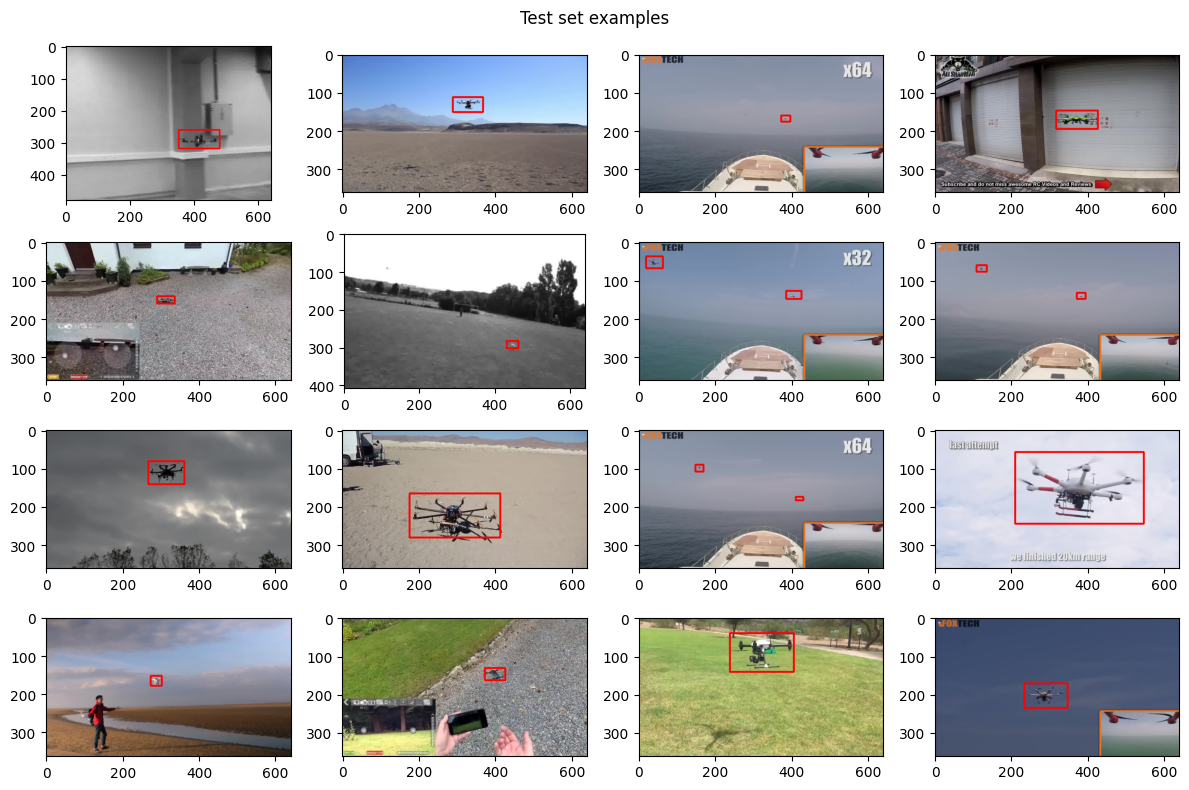

In [32]:
plot_row = 4
plot_col = 4

fig, axs = plt.subplots(plot_row, plot_col, figsize=(12,8), layout='tight')

for i in range(plot_row):
    for j in range(plot_col):
        rand_path = os.path.join(TEST_PATH, random.choice(jpg_test_list).rstrip('.JPEG'))


        image = cv.imread(rand_path + '.JPEG')
        width = 640
        height = int(image.shape[0] / (image.shape[1]/width))

        image = cv.resize(image, dsize=(width, height))
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)

        with open(rand_path + '.txt', encoding='utf-8') as f:
            coord_file = f.readlines()

        for bbox_coord in coord_file:
            bbox_coord = bbox_coord.strip()
            b_list = list(map(float, bbox_coord.split()[1:]))
            b_list = yolobbox2bbox(b_list, image.shape)

            image = cv.rectangle(image, (b_list[0], b_list[1]), (b_list[2], b_list[3]),
                          color=(255,0,0), thickness=4)

        axs[i, j].imshow(image)

fig.suptitle('Test set examples')
plt.show()